# Neural Networks Lab

In this lab, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

**Answer:** The Universal Approximation Theorem says that neural networks can estimate the output of any mathematical function, no matter how many inputs that function takes or how many possible ouputs it may produce. Even a neural network with a single layer can provide pretty good estimates, but often a neural network with a larger hidden layer and/or more hidden layers will do even better. Since basically any process can be described as a mathematical function, neural networks can, in theory, predict the outcome of basically any process pretty well. In practice, a neural network must have the right size and level of complexity to 'learn' a complex process, and it must be trained correctly.

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

**Answer:** The first caveat: a neural network cannot compute any function, it can only approximate it, which is just another way of saying it will provide a pretty good guess of what the function would output for a given input or set of inputs.

The second caveat is not obvious, but it's also not too important most of the time. It says that a neural network can only really approximate a continuous function, since neural networks themselves have continuous output. If a function has undefined outputs in a given range, or if its output jumps wildly from point to point, then a neural network isn't guaranteed to deliver a decent approximation.

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on the page to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

**Answer:** The weight $w$ coming in must be very high. The higher the $w$, the lower the bias $b$ must be so that the 'step' between output 0 and output 1 occurs in the range (0,1). The lower the bias, the higher the value of $x$ must be before the step occurs. 

This makes sense, since the purpose of the bias is to control the level of activation of a node given little or no input. The higher the weight, the lower the value of x must be in order to hit the 'step' and trigger activation of the node. This makes sense, since the node's inputs will have a greater linear effect on the activation of the node. (And we are here dealing with only positive inputs in the range (0,1).)

Since we're working with a sigmoid function with such a high weight that is an approximation of a step function, we can parameterize our hypothetical step function with $s$, which just gives the location of the step between 0 and 1. It is $s = -b/w$.

**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and why are we working with this one instead of $f(x)$?

**Answer:** Previously, we adjusted parameters to show different values for the weighted output from the hidden layer. But even with only a single output neuron, that is not what our network outputs! The final output neuron has a bias of its own, and an activation function. To abstract away from that, we were manipulating $h$ to approximate $f(x)$ with the inverse of the activation applied and without any bias term. This other function is just the answer to the question: what function do we want the weighted output $Z$ of our hidden layer to approximate so that once we apply a sigmoid activation function (and no bias) to $Z$ we will arrive at an approximation of $f(x)$?

**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score.

**Answer:**

$h_1 = -1.2$

$h_2 = -1.6$

$h_3 = -0.3$

$h_4 = -1.0$

$h_5 = 1.0$

average deviation = .38

**Problem 6**: Build the neural network from your work in Problem 5 here.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?
* In order to create step functions between 0 and 0.2, 0.2 and 0.4, etc., what does this suggest about the activation function in these neurons? Note that these activation functions will be different, but related.
* What do the values of $h_i$ represent?

Check out the Neural Networks I notes for an implementation in NumPy; you should be able to use this as a starting point for your model.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define our functions.
def sigmoid_activation(Z):
    if Z > 6:
        return(1)
    if Z < -6:
        return(0)
    # So that our function doesn't need to compute the sigmoid 
    # for extreme values, which is computationally difficult.
    return(1/(1+np.exp(-Z)))

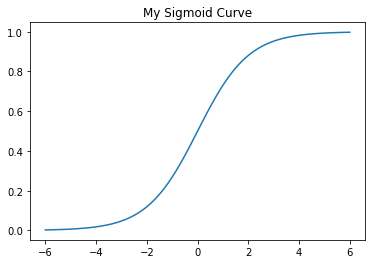

In [3]:
foo = np.linspace(-6,6,100)
bar = [sigmoid_activation(Z) for Z in foo]
_ = plt.plot(foo, bar)
_ = plt.title('My Sigmoid Curve')

In [4]:
# Activation function on output will be the identity function:

def identity_activation(Z):
    return(Z)

In [5]:
# Find weights and biases to approximate step function. 
# We use a high weight of 500 to approximate the step function.

def solve_for_bias(s, w=500):
    return(-w * s)

In [6]:
# Set up model architecture and define the weights and biases.
# Weights and biases for hidden layer
steps = [0,.2,.2,.4,.4,.6,.6,.8,.8,1]
bias_hl = np.array([solve_for_bias(s) for s in steps])
weights_hl = np.array([500] * 10)

# Weights and biases for output node
bias_output = 0
weights_output = np.array([-1.2, 1.2, -1.6, 1.6, -.3, .3, -1, 1, 1, -1])
# These come just from our values of h

In [7]:
# Define function to run the network:
def run_network(x, activation_on_output = identity_activation):
    input_value = x
    Z_hl = input_value * weights_hl + bias_hl
    activation_hl = np.array([sigmoid_activation(Z) for Z in Z_hl])

    Z_output = np.sum(activation_hl * weights_output) + bias_output
    activation_output = activation_on_output(Z_output) # Very complex and vital step here.
    return(activation_output)

**Problem 7**: Once you've built the neural network, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and use the `pynverse` [library](https://pypi.python.org/pypi/pynverse) to manually estimate the performance of your neural network using mean squared error.

Recall that mean squared error is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.

In [8]:
x_values = np.linspace(0,1,1000)
y_hat = [run_network(x) for x in x_values]

def f(x):
    return(.2 + .4*(x**2) + .3*x*np.sin(15*x)+.05*np.cos(50*x))

y = [f(x) for x in x_values]

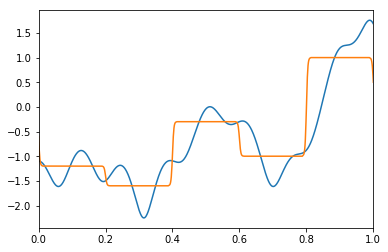

In [9]:
from pynverse import inversefunc
inv_sigmoid = inversefunc(sigmoid_activation)

y_hat = [run_network(x) for x in x_values]
y_invsig = [inv_sigmoid(i) for i in y]
_ = plt.plot(x_values, y_invsig)
_ = plt.plot(x_values, y_hat)
_ = plt.xlim((0,1))

In [10]:
def my_MSE(y_hat, y):
    if len(y_hat) != len(y):
        print('y_hat and y must be of equal length!')
        return
    n   = len(y_hat)
    SE  = [(y_hat[i] - y[i])**2 for i in range(n)]
    MSE = sum(SE)/n
    return(MSE)

In [11]:
my_MSE(y_hat, y)

1.4766701370475357

Note: This will vary depending on your original function!

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?

**Answer:** There are many options, like increasing the number of nodes or increasing the number of layers. We want to be careful to not overfit, however.